In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")


In [6]:
# Declare a Base using `automap_base()`

Base = automap_base()

# Use the Base class to reflect the database tables

Base.prepare(autoload_with=engine)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [8]:
# Assign the measurement class to a variable called `Measurement` and
Measurement = Base.classes.measurement

# assign the station class to a variable called `Station`
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"The most recent date in the dataset is: {most_recent_date}")

The most recent date in the dataset is: 2017-08-23


One year from the last date (2017-08-23) in the dataset is: 2018-08-23


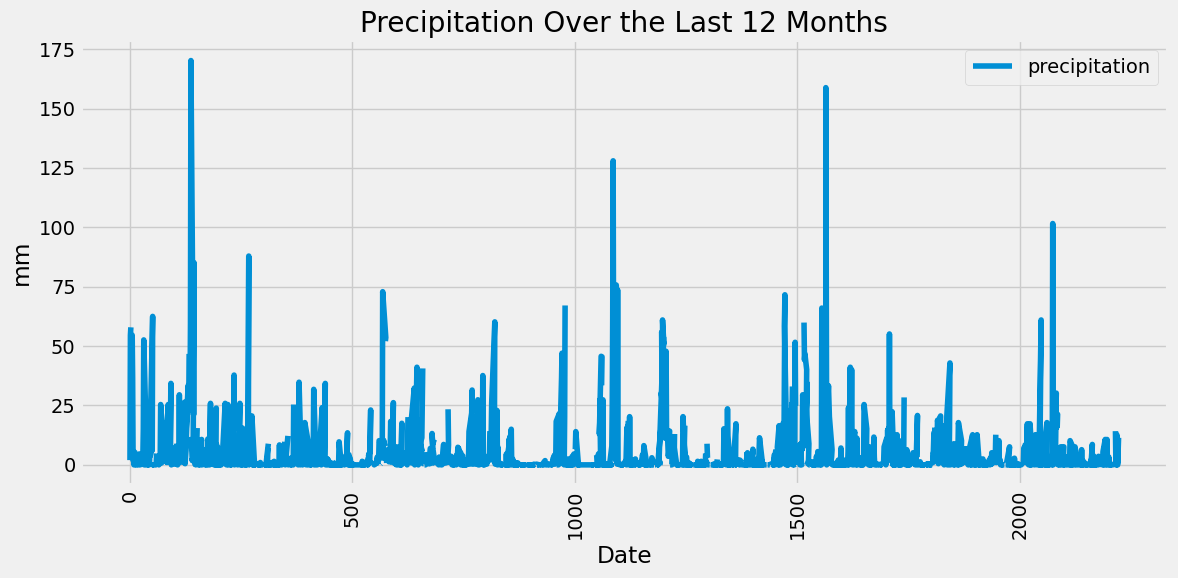

In [35]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
most_recent_date = "2017-08-23"

recent_date_dt = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = recent_date_dt - dt.timedelta(days=365)

precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()


# Calculate the date one year from the last date in data set.
recent_date_dt = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_from_recent = recent_date_dt.replace(year=recent_date_dt.year + 1)
print(f"One year from the last date ({most_recent_date}) in the dataset is: {one_year_from_recent.strftime('%Y-%m-%d')}")

# Perform a query to retrieve the data and precipitation scores

recipitation_data = (
    session.query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date >= one_year_ago)
    .order_by(Measurement.date)
    .all()
)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(12, 6), title="Precipitation Over the Last 12 Months", legend="best")
plt.xlabel('Date')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df['precipitation'].describe()
print ("Summary Statistics for Precipitation Data:\n", summary_stats)


Summary Statistics for Precipitation Data:
 count    2015.000000
mean        4.485112
std        11.690532
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations in the dataset: {total_stations}")

Total number of stations in the dataset: 9


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(
    Measurement.station,
    func.count(Measurement.station).label('count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
print(f"The most active station is: {most_active_station}")
temp_stats = session.query(
    func.min(Measurement.tobs),
    func.avg(Measurement.tobs),
    func.max(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()
min_temp, avg_temp, max_temp = temp_stats[0]
print(f"Temperature stats for the most active station ({most_active_station}):")
print(f"Lowest Temperature: {min_temp}°F")
print(f"Average Temperature: {avg_temp:.1f}°F")
print(f"Highest Temperature: {max_temp}°F")


The most active station is: USC00519281
Temperature stats for the most active station (USC00519281):
Lowest Temperature: 12.2°F
Average Temperature: 22.0°F
Highest Temperature: 29.4°F


The most active station is: USC00519281


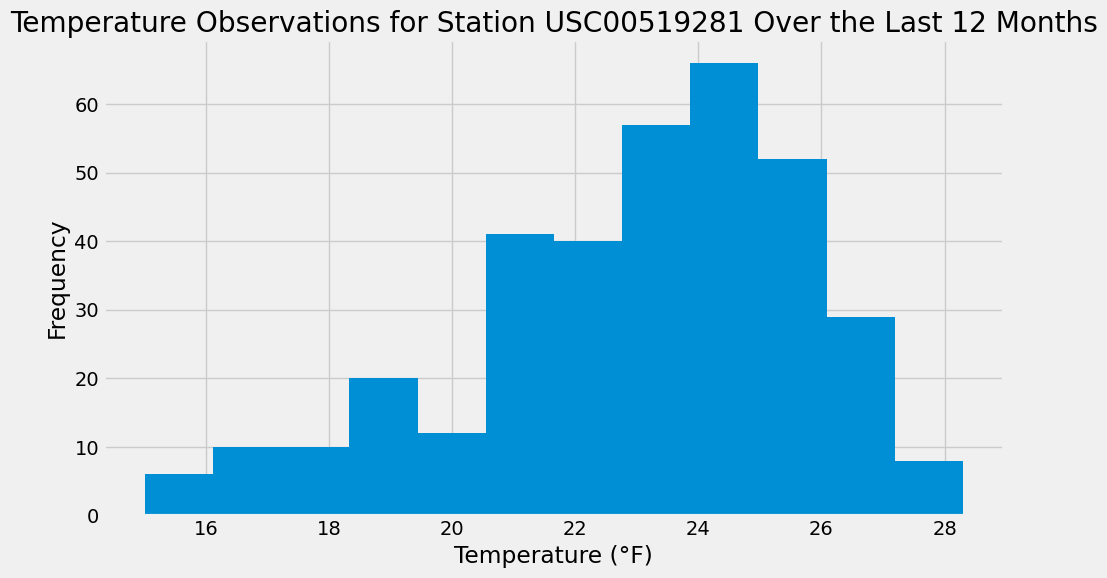

In [22]:
# Most recent date in dataset
most_recent_date = "2017-08-23"
recent_date_dt = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = recent_date_dt - dt.timedelta(days=365)

# Find the station with the greatest number of observations
most_active_station = session.query(
    Measurement.station,
    func.count(Measurement.station).label('count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]

print(f"The most active station is: {most_active_station}")

# Query the last 12 months of temperature observation data for that station
tobs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date).all()

# Convert the query results to a Pandas DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=['date', 'tobs'])

# Plot the results as a histogram with bins=12
plt.figure(figsize=(10, 6))
tobs_df['tobs'].plot(kind='hist', bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station} Over the Last 12 Months')
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_stations = (
    session.query(Measurement.station, func.count(Measurement.station).label('station_count'))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

print("Stations and their counts in descending order of activity:")
for station, count in active_stations:
    print(f"Station {station}: {count} observations")

Stations and their counts in descending order of activity:
Station USC00519281: 2772 observations
Station USC00519397: 2724 observations
Station USC00513117: 2709 observations
Station USC00519523: 2669 observations
Station USC00516128: 2612 observations
Station USC00514830: 2202 observations
Station USC00511918: 1979 observations
Station USC00517948: 1372 observations
Station USC00518838: 511 observations


# Close Session

In [ ]:
# Close Session
session.close()
